In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
print(os.listdir("Dataset\Corn"))

['Cercospora_leaf_spot', 'Common_rust', 'Healthy', 'Northern_Leaf_Blight']


In [3]:
SIZE = 256

In [5]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("Dataset\Corn\Healthy"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob("Dataset\Corn\Cercospora_leaf_spot"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob("Dataset\Corn\Common_rust"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
for directory_path in glob.glob(r"Dataset\Corn\Northern_Leaf_Blight"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

Healthy
Dataset\Corn\Healthy\00031d74-076e-4aef-b040-e068cd3576eb___R.S_HL 8315 copy 2.jpg
Dataset\Corn\Healthy\00665f92-adb0-41eb-bba7-9eeadecfe10e___R.S_HL 8325 copy 2.jpg
Dataset\Corn\Healthy\01c3bf88-d315-42a3-8fa1-fc80a05c97f1___R.S_HL 8189 copy.jpg
Dataset\Corn\Healthy\026bd735-b9f4-4eab-86f3-23df15dbec95___R.S_HL 7938 copy.jpg
Dataset\Corn\Healthy\028ed539-32f5-4540-a6af-466179837de9___R.S_HL 8212 copy.jpg
Dataset\Corn\Healthy\0292a37f-07d0-401f-83d8-cde4c98547d8___R.S_HL 0630 copy 2.jpg
Dataset\Corn\Healthy\02ab8d66-0385-43db-855a-ea5f8811ebd5___R.S_HL 7954 copy.jpg
Dataset\Corn\Healthy\02e76b75-f201-44ee-a694-35edf97cc82b___R.S_HL 8015 copy.jpg
Dataset\Corn\Healthy\03000565-29dc-4d56-8132-a5d0d36a8359___R.S_HL 0602.JPG
Dataset\Corn\Healthy\0305800e-de91-4742-b923-f9a1c0799392___R.S_HL 8116 copy.jpg
Dataset\Corn\Healthy\03297f41-30ff-42db-a482-84665adfe4da___R.S_HL 8260 copy 2.jpg
Dataset\Corn\Healthy\03fc887f-e206-4233-8829-ff7070bb3449___R.S_HL 5519 copy 2.jpg
Dataset\Corn\He

In [6]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
len(train_images), len(train_labels)

(3852, 3852)

In [8]:
#Split data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, train_size=0.8, shuffle=True)

In [9]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train_encoded = le.transform(y_train)
le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [10]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [11]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [12]:
x_train.shape

(3081, 256, 256, 3)

In [13]:
x_train_new = x_train.reshape(3081, 256*256*3)

In [14]:
x_train.shape, x_train_new.shape

((3081, 256, 256, 3), (3081, 196608))

In [15]:
# Train the model on training data
RF_model.fit(x_train_new, y_train_encoded) #For sklearn no one hot encoding

RandomForestClassifier(random_state=42)

In [16]:
x_test.shape

(771, 256, 256, 3)

In [17]:
x_test_new = x_test.reshape(771, 256*256*3)

In [18]:
x_test_new.shape

(771, 196608)

In [19]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(x_test_new)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [20]:
#Print overall accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, prediction_RF)
print ("Accuracy = ", accuracy)

Accuracy =  0.8625162127107653


In [21]:
prediction_RF

array(['Northern_Leaf_Blight', 'Northern_Leaf_Blight', 'Common_rust',
       'Common_rust', 'Healthy', 'Healthy', 'Common_rust', 'Healthy',
       'Healthy', 'Common_rust', 'Northern_Leaf_Blight', 'Healthy',
       'Northern_Leaf_Blight', 'Northern_Leaf_Blight', 'Healthy',
       'Northern_Leaf_Blight', 'Healthy', 'Common_rust', 'Healthy',
       'Northern_Leaf_Blight', 'Common_rust', 'Northern_Leaf_Blight',
       'Healthy', 'Common_rust', 'Northern_Leaf_Blight',
       'Northern_Leaf_Blight', 'Northern_Leaf_Blight', 'Healthy',
       'Healthy', 'Healthy', 'Healthy', 'Common_rust', 'Healthy',
       'Northern_Leaf_Blight', 'Northern_Leaf_Blight', 'Common_rust',
       'Northern_Leaf_Blight', 'Healthy', 'Common_rust', 'Healthy',
       'Northern_Leaf_Blight', 'Healthy', 'Healthy',
       'Cercospora_leaf_spot', 'Healthy', 'Common_rust',
       'Northern_Leaf_Blight', 'Common_rust', 'Northern_Leaf_Blight',
       'Northern_Leaf_Blight', 'Healthy', 'Northern_Leaf_Blight',
       'Norther

<AxesSubplot:>

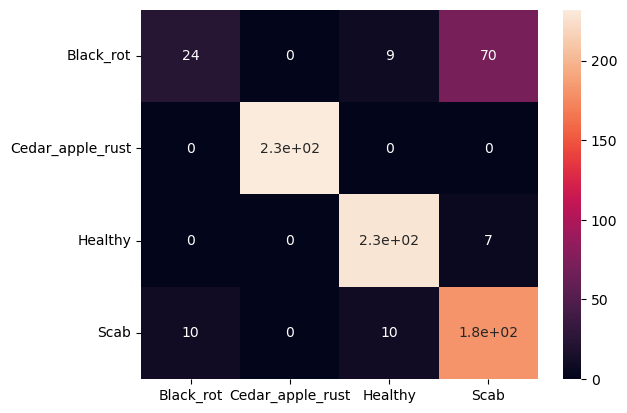

In [22]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix - verify accuracy of each class
cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
labels = ["Black_rot", "Cedar_apple_rust", "Healthy", "Scab"]
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels)

In [23]:
cm

array([[ 24,   0,   9,  70],
       [  0, 232,   0,   0],
       [  0,   0, 228,   7],
       [ 10,   0,  10, 181]], dtype=int64)

The prediction for this image is:  ['Northern_Leaf_Blight']
The actual label for this image is:  Common_rust
Label: 3


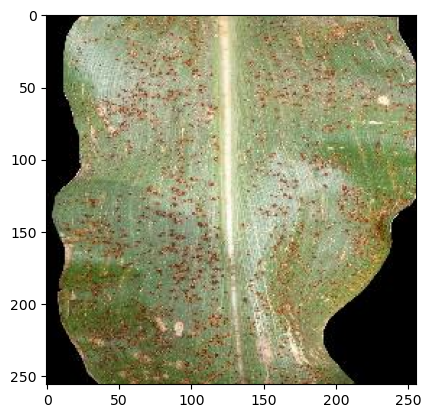

In [24]:
#Check results on a few select images
#n=5 #dog park. RF works better than CNN
n=55 #Select the index of image to be loaded for testing
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction_RF = RF_model.predict(x_test_new)[0] 
label = prediction_RF
prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])
print("Label:", label)

In [ ]:
#Black Rot = 0
#Cedar Apple Rust = 1
#Healthy = 2
#Scab = 3